# Analysis of data that lacks informative features

Build a pipeline to analyze the N2 dataset.  These results are an example of what you can find when the data lacks informative features.

In [126]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import RidgeCV
import warnings

In [127]:
# Ignore warnings
warnings.filterwarnings('ignore')

In [128]:
input_file_path = "../../../data/n2.csv"
df = pd.read_csv(input_file_path, header=0, sep=",")

In [129]:
X = df.loc[:, df.columns != 'ctrl/case']

In [148]:
y = df['ctrl/case'].astype('int').tolist()
features = df.columns

In [150]:
print(y)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


## Feature importance from coefficients

None of the features are important

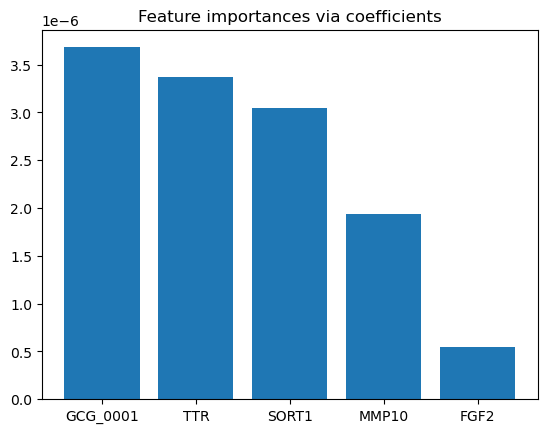

In [166]:
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X, y)
importance = np.abs(ridge.coef_)

# Find the 5 most important coefficients and features
# Operate on the coefficients and features as tuples
# maintain the association as they are sorted and selected.
tup = list(zip(importance, features))
tup = sorted(tup,  key=lambda x: abs(x[0]), reverse=True)
tup = [x for x in tup[:5] if not math.isclose(x[0], 0)]
importance, features = list(zip(*tup))

plt.bar(height=importance, x=features)
plt.title("Feature importances via coefficients")
plt.show()

## Try to learn the data

In [152]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso

sfm_lsvc = SelectFromModel(LinearSVC(penalty="l1", dual=False, max_iter=10000))
sfm_lr = SelectFromModel(LogisticRegression(dual=False, solver='liblinear', max_iter=10000))

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', sfm_lsvc),
    ('model', Lasso())
])

In [153]:
# Show the parameters for use in the parameter grid
pipeline.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('feature_selection',
   SelectFromModel(estimator=LinearSVC(dual=False, max_iter=10000, penalty='l1'))),
  ('model', Lasso())],
 'verbose': False,
 'scaler': StandardScaler(),
 'feature_selection': SelectFromModel(estimator=LinearSVC(dual=False, max_iter=10000, penalty='l1')),
 'model': Lasso(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'feature_selection__estimator__C': 1.0,
 'feature_selection__estimator__class_weight': None,
 'feature_selection__estimator__dual': False,
 'feature_selection__estimator__fit_intercept': True,
 'feature_selection__estimator__intercept_scaling': 1,
 'feature_selection__estimator__loss': 'squared_hinge',
 'feature_selection__estimator__max_iter': 10000,
 'feature_selection__estimator__multi_class': 'ovr',
 'feature_selection__estimator__penalty': 'l1',
 'feature_selection__estimator__random_state': None,
 'feature_selection__estimator__tol': 0.0001,
 'feature

In [160]:
# Look at the parameters revealed by get_params and see which items to include in the grid
parametersGrid = {
    "model__alpha": np.arange(0.01, 2, .1)
}

search = GridSearchCV(
    pipeline, 
    parametersGrid, 
    scoring="accuracy", 
    cv=5, 
    verbose=False
)

## Train the classifier

In [161]:
search.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('feature_selection',
                                        SelectFromModel(estimator=LinearSVC(dual=False,
                                                                            max_iter=10000,
                                                                            penalty='l1'))),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91, 1.01,
       1.11, 1.21, 1.31, 1.41, 1.51, 1.61, 1.71, 1.81, 1.91])},
             scoring='accuracy', verbose=False)

In [162]:
print(search)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('feature_selection',
                                        SelectFromModel(estimator=LinearSVC(dual=False,
                                                                            max_iter=10000,
                                                                            penalty='l1'))),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91, 1.01,
       1.11, 1.21, 1.31, 1.41, 1.51, 1.61, 1.71, 1.81, 1.91])},
             scoring='accuracy', verbose=False)


In [163]:
search.best_params_

{'model__alpha': 0.01}

In [137]:
search.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('scaler', StandardScaler()),
  ('feature_selection',
   SelectFromModel(estimator=LinearSVC(dual=False, max_iter=10000, penalty='l1'))),
  ('model', Lasso())],
 'estimator__verbose': False,
 'estimator__scaler': StandardScaler(),
 'estimator__feature_selection': SelectFromModel(estimator=LinearSVC(dual=False, max_iter=10000, penalty='l1')),
 'estimator__model': Lasso(),
 'estimator__scaler__copy': True,
 'estimator__scaler__with_mean': True,
 'estimator__scaler__with_std': True,
 'estimator__feature_selection__estimator__C': 1.0,
 'estimator__feature_selection__estimator__class_weight': None,
 'estimator__feature_selection__estimator__dual': False,
 'estimator__feature_selection__estimator__fit_intercept': True,
 'estimator__feature_selection__estimator__intercept_scaling': 1,
 'estimator__feature_selection__estimator__loss': 'squared_hinge',
 'estimator__feature_selection__estimator__max_iter': 10000,
 '

In [164]:
search.best_score_

nan

## Coefficients and features from the best fit

In [167]:
import math
import pprint

coefficients = search.best_estimator_.named_steps['model'].coef_
tup = list(zip(coefficients, features))
tup = sorted(tup,  key=lambda x: abs(x[0]), reverse=True)
tup = [x for x in tup if not math.isclose(x[0], 0)]
pprint.pprint(tup)

[(-0.0988332590737932, 'MMP10'),
 (0.09291681287804597, 'SORT1'),
 (0.06713461477035278, 'TTR'),
 (-0.043353296784376855, 'GCG_0001'),
 (0.005543907958337834, 'FGF2')]


## Permutation Tests

In [169]:
# Add random features and the classifier score should go down.
n_uncorrelated_features = 20
rng = np.random.RandomState(seed=0)
# Use same number of samples as in the psych data and 20 features
X_rand = rng.normal(size=(X.shape[0], n_uncorrelated_features))

### Permutation test over the data, and data including random features

In [170]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import permutation_test_score

clf = search
cv = StratifiedKFold(2, shuffle=True, random_state=0)

score_psych, perm_scores_psych, pvalue_psych = permutation_test_score(
    clf, X, y, cv=cv, n_permutations=1000, scoring="roc_auc", verbose=False
)

score_rand, perm_scores_rand, pvalue_rand = permutation_test_score(
    clf, X_rand, y, cv=cv, n_permutations=1000, scoring="roc_auc", verbose=False)

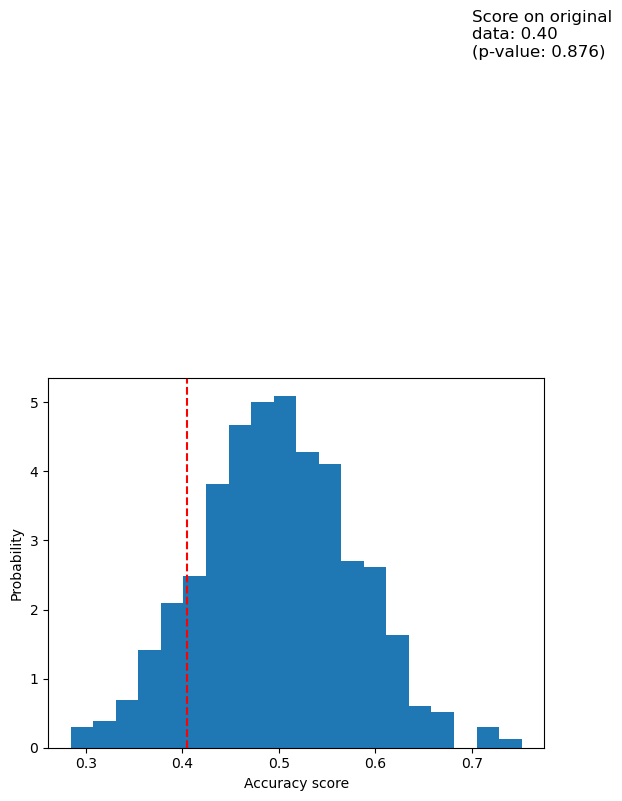

In [171]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.hist(perm_scores_psych, bins=20, density=True)
ax.axvline(score_psych, ls="--", color="r")
score_label = f"Score on original\ndata: {score_psych:.2f}\n(p-value: {pvalue_psych:.3f})"
ax.text(0.7, 10, score_label, fontsize=12)
ax.set_xlabel("Accuracy score")
_ = ax.set_ylabel("Probability")

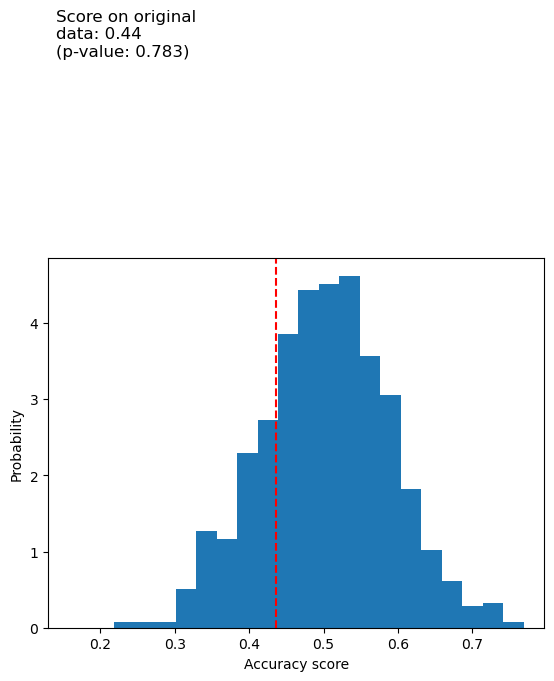

In [172]:
_, ax = plt.subplots()

ax.hist(perm_scores_rand, bins=20, density=True)
ax.set_xlim(0.13)
ax.axvline(score_rand, ls="--", color="r")
score_label = f"Score on original\ndata: {score_rand:.2f}\n(p-value: {pvalue_rand:.3f})"
ax.text(0.14, 7.5, score_label, fontsize=12)
ax.set_xlabel("Accuracy score")
ax.set_ylabel("Probability")
plt.show()